## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('C:/My Python/AnalyzeABTestResults 2/ab_data.csv')
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.query('converted == 1').user_id.nunique()/df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query('group == "treatment" & landing_page  != "new_page"').count() + df.query('group != "treatment" & landing_page  == "new_page"').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df[(df['group'] =="treatment") & (df['landing_page'] == "new_page") | (df['group'] =="control") & (df['landing_page'] == "old_page")]
df2 

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
dup_user = df2.user_id.value_counts().idxmax()

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id'] == dup_user]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop(index=2893,inplace=True)


C:\Users\pbirthal\AppData\Local\Temp\ipykernel_33948\1402159862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(index=2893,inplace=True)


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2.query('converted == 1').count()/len(df2)

user_id         0.119597
timestamp       0.119597
group           0.119597
landing_page    0.119597
converted       0.119597
dtype: float64

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
control_ctr = df2.query('group == "control" & converted == 1').count()/df2.query('group == "control"').count()
control_ctr

user_id         0.120386
timestamp       0.120386
group           0.120386
landing_page    0.120386
converted       0.120386
dtype: float64

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treat_ctr = df2.query('group == "treatment" & converted == 1').count()/df2.query('group == "treatment"').count()
treat_ctr

user_id         0.118808
timestamp       0.118808
group           0.118808
landing_page    0.118808
converted       0.118808
dtype: float64

In [49]:
obs_diff = (treat_ctr - control_ctr)  # Changed the order
obs_diff = obs_diff[0]
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [18]:
df2.query('landing_page == "new_page"').count()/len(df2)

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**
 - *Based on the above results , there is no sufficient evidence to say that the new treatement page leads to more conversion. The probalility of converting regardless of the landing page is little more than probability of new page leading to conversions. Also there is a minute gap between probalities of control group and treatment group which shows control group being more favoured choice here.*


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**
 - *Null Hypothesis - The old page is better choice for converting than new page* | **$p_{old}$** >= **$p_{new}$** 
 - *Alternative Hypothesiss = The new page is better choice for converting than old page* | **$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
conv_null = df2.query('converted == 1').user_id.nunique()/len(df2)
conv_null

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
conv_null

0.11959708724499628

c. What is $n_{new}$?

In [21]:
df2_new = df2.query('group == "treatment"')
len(df2_new)

145310

d. What is $n_{old}$?

In [22]:
df2_old = df2.query('group == "control"')
len(df2_old)

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([0,1], size = len(df2_new), p = [1-conv_null,conv_null])
p_new_null  = len(new_page_converted[new_page_converted ==1])/len(new_page_converted)
p_new_null

0.118938820452825

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([0,1], size = len(df2_old), p = [1-conv_null,conv_null])
p_old_null  = len(old_page_converted[old_page_converted ==1])/len(old_page_converted)
p_old_null

0.11898206148381679

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
p_new_null - p_old_null

-4.3241030991791884e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
# Sampling distribution 

# p_diffs = []

# for _ in range(10000):

#     new_page_converted = np.random.choice(2, size=n_new, replace=True, p=[1-new_cr, new_cr])

#     old_page_converted = np.random.choice(2, size=n_old, replace=True, p=[1-old_cr, old_cr])

#     diff = new_page_converted.mean() - old_page_converted.mean()

#     p_diffs.append(diff)

# p_diffs = np.array(p_diffs)

 

# Faster method
p_diffs = []

new_converted_simulation = np.random.binomial(len(df2_new),conv_null, 10000)/len(df2_new)

old_converted_simulation = np.random.binomial(len(df2_old), conv_null, 10000)/len(df2_old)

p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

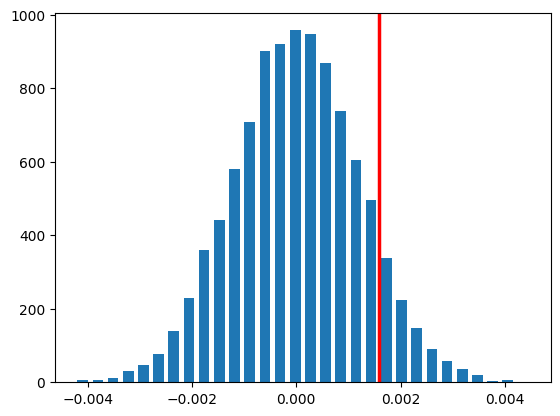

In [27]:
plt.hist(p_diffs, rwidth=0.7, bins=30)
plt.axvline(obs_diff.values[0], color = 'red', lw=2.5)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [48]:
(p_diffs > obs_diff).mean()

0.903

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value computed above is the p-value. If the p-value is high then it suggest that null hypothesis cannot be rejected. Also p-value is greater than alpha i.e. 0.05 , therefore alternative hypothesis is rejected, which concludes that there is no evidence of new page better than the old page. Hence , old page will still be the better choice.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
df2.query('landing_page =="old_page"')['user_id'].count()

145274

In [30]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" & converted ==1')['user_id'].count()
convert_new = df2.query('landing_page == "new_page" & converted ==1')['user_id'].count()
n_old = df2.query('landing_page =="old_page"')['user_id'].count()
n_new = df2.query('landing_page =="new_page"')['user_id'].count()

In [31]:

count_array = np.array([convert_new, convert_old])  #Changed the order 
nobs_array = np.array([n_new, n_old])  # Changed the order

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
z_score , p_value = sm.stats.proportions_ztest(count_array, nobs_array,alternative='larger')
print(z_score, p_value)

-1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The Zscore  is ~1.31 and p-value is ~0.905 obtained from the above method. We have here is one right - tailed test and Zalpha is 1.645 for this. From this we conclude to not reject the null hypothesis as Zscore is less than Zalpha. Further this is supported from the p-value obtained which is similar to p-value obtained in the previous approach. Yes these , findings agree with each other , hence old _page is equal/better than new_page.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**It is better to perform Logistics regression here as there are binary classes. If there is any relation between the users who have control page gets converted or treatment page gets converted, will ensure some significance.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df2['intercept'] =1
df2[['control', 'ab_page']] =pd.get_dummies(df2['group'], dtype=int)


C:\Users\pbirthal\AppData\Local\Temp\ipykernel_33948\3566410585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept'] =1
C:\Users\pbirthal\AppData\Local\Temp\ipykernel_33948\3566410585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['control', 'ab_page']] =pd.get_dummies(df2['group'], dtype=int)
C:\Users\pbirthal\AppData\Local\Temp\ipykernel_33948\3566410585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [50]:
df2 = df2.drop(columns='control')

In [51]:

model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]).fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Apr 2024   Pseudo R-squ.:               8.077e-06
Time:                        15:14:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value assosciated with the ab_page  is 0.190. HO - There is no effect or assocaition of independent variables on the probability of the outcome variables i.e coefficents of independent varaibles = 0 . H1 - The coefficient value is not equal to 0 .**

*The difference in the previous hypothesis and this hypothesis is selection of null hypothesis , In previous, conversion rate probablity was the factor , whereas here the relationship between dependent and independent varaibles from the data is chosen.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Considering other factors will give more clarity on the relation between the variables. One is higher order terms which can help in finding more complex relationship in data ,their correlation between variables can shed some light and be useful for the predicting the response, however the disadvantage here can be more complexity in the model. Other thna complexity multicollinearity between varaibles can also be a disadvantage.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [53]:
countries_df = pd.read_csv('C:/My Python/AnalyzeABTestResults 2/countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [54]:
df_new['country'].value_counts()

country
US    203619
UK     72466
CA     14499
Name: count, dtype: int64

In [55]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'], dtype= int)


In [56]:
model_2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'UK']]).fit()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [58]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 25 Apr 2024   Pseudo R-squ.:               2.323e-05
Time:                        15:35:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

**The p-value of independent variables US = 0.130 , UK = 0.074, ab_page = 0.191 is more than alpha(0.05) i.e. significance level of risk, therefore we fail to reject null hypothesis in this scenario.** 

**Also , The countries seems to have no relationship with the conversion factor as the R value is 0. Therefore no relationship can be established with dependent varaible "converted". The coefficient will remain 0 for each one of them.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [65]:
### Fit Your Linear Model And Obtain the Results
df_new['US_new'] = df_new['US']*df_new['ab_page']
df_new['UK_new'] = df_new['UK']*df_new['ab_page']
df_new['CA_new'] = df_new['CA']*df_new['ab_page']
model_3 = sm.Logit(df_new['ab_page'], df_new[['intercept', 'US','UK']]).fit()
model_3.summary2()

Optimization terminated successfully.
         Current function value: 0.693144
         Iterations 3


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: ab_page          Pseudo R-squared: 0.000      
Date:               2024-04-25 15:59 AIC:              402839.1669
No. Observations:   290584           BIC:              402870.9058
Df Model:           2                Log-Likelihood:   -2.0142e+05
Df Residuals:       290581           LL-Null:          -2.0142e+05
Converged:          1.0000           LLR p-value:      0.40875    
No. Iterations:     3.0000           Scale:            1.0000     
--------------------------------------------------------------------
             Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
--------------------------------------------------------------------
intercept    0.0142     0.0166    0.8554   0.3923   -0.0183   0.0468
US          -0.0124     0.0172   -0.7196   0.4718   -0.0461   0.0213
UK          -0.0212     0.0182   -1.1661   0.2436   -0.0569   0.0144
==================================================================

"""

**The p value of all the variables are the higher than alpha, which states there is no evidence to reject the null hypothesis. Also, based on this no conclusion or remarks can be made on any relation between countries and the page factor**

In [67]:
model_4 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','US','US_new','UK', 'UK_new']]).fit()
model_4.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2024-04-25 16:35 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           LLR p-value:      0.19199    
No. Iterations:     6.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
US_new         0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
UK_new         0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

**Again, p-values have reduced here slightly with countries*ab_page but still more than alpha , thus we fail to reject null hypothesis. The countries and ab_page interaction fails to show any relationship with our dependent variable 'converted'**

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.